## Calculations of SGR1935 rate constraints at different fluences.

The first detection of SGR1935 FRB was ST 200428A (2020), which recorded a fluence of 1.5 MJy$\cdot$ms. This serves as our reference for rate calculations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import scipy.optimize

plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 16})

In [2]:
# volumetric rate for bursts with energy releases equivalent to (or greater) than ST 200428A
R_vol = 7.23e7*u.Gpc**(-3)*u.yr**(-1)

V_MW = 1e-7*u.Gpc**3 # Milky Way volume

In [3]:
R_MJy_level = R_vol*V_MW
R_MJy_level # for all magnetars w/in MW

<Quantity 7.23 1 / yr>

In [4]:
# ~30 magnetars in Galaxy
N_mag = 30
R_MJy_level_per_magnetar = R_MJy_level/N_mag

print('We expect SGR1935 to produce 1.5 MJy*ms FRBs at a rate of ', R_MJy_level_per_magnetar)

We expect SGR1935 to produce 1.5 MJy*ms FRBs at a rate of  0.241 1 / yr


#### I make further use of the two following observations:
- Kirsten et al (2021):    
    - Two Jy level detections observed over 522.7 hrs (112 $\pm$ 22 and 24 $\pm$ 5 Jy$\cdot$ms, respectively). 
    - $\implies$ Jy$\cdot$ms fluence level FRBs can be observed at a rate of 33.5/yr
- FAST (2020):
    - 60 mJy$\cdot$ms fluence FRB, observed over the period of 1.03 hours
    - $\implies$ mJy$\cdot$ms fluence level FRBs can be observed at a rate of 525.6/yr

In [5]:
obs_rate_pnts = [525.6, 33.5, 0.241]
obs_fluence_pnts = np.log10([6e-2, 1e2, 1.5e6])

def ln_model(x, A, B, C):
    return A*np.e**(B*x + C)

guesses = np.array([1, -0.1, 5])
opt, cov = scipy.optimize.curve_fit(ln_model, obs_fluence_pnts, obs_rate_pnts, guesses) 
print('A, B, C =', opt)

A, B, C = [ 2.30478437 -0.85489779  4.38500063]


/home/darbymccauley/.local/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


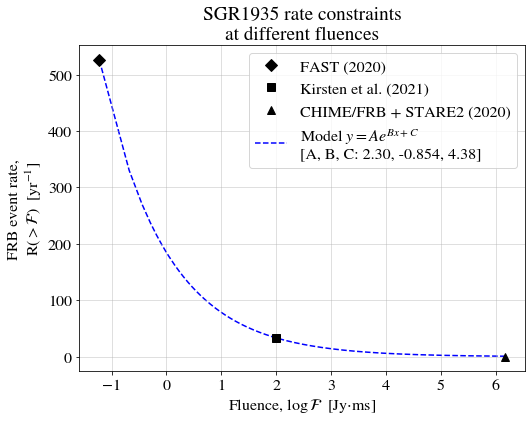

In [9]:
plt.figure(figsize=(8,6))

obs_labels = ['FAST (2020)', 'Kirsten et al. (2021)', 'CHIME/FRB + STARE2 (2020)']
obs_markers = ['D', 's', '^']
for i in range(len(obs_rate_pnts)):
    plt.plot(obs_fluence_pnts[i], obs_rate_pnts[i], 'k', marker=obs_markers[i], 
             label=obs_labels[i], markersize=8, linestyle='None')
    
x_range = np.log10(np.linspace(6e-2, 1.5e6, 10000000))
plt.plot(x_range, ln_model(x_range, *opt), 'b--', label='Model $y=Ae^{Bx+C}$\n[A, B, C: 2.30, -0.854, 4.38]', zorder=1)


plt.xlabel('Fluence, $\mathcal{\log{F}}$  [Jy$\cdot$ms]')
plt.ylabel('FRB event rate,\nR($>\mathcal{F}$)  [yr$^{-1}$]')
plt.title('SGR1935 rate constraints\nat different fluences')
plt.legend()

plt.grid(alpha=0.5)

plt.show()

In [16]:
ln_model(3, *opt)

14.229174440681335

Therefore, we can expect to see about 14 FRBs from SGR1935 per year that have a fluence of 1 kJy$\cdot$ms.

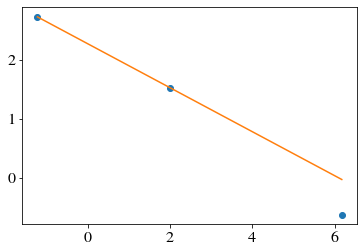

In [15]:
obs_rate_pnts = np.log10([525.6, 33.5, 0.241])
obs_fluence_pnts = np.log10([6e-2, 1e2, 1.5e6])

plt.figure()
plt.plot(obs_fluence_pnts, obs_rate_pnts, 'o')
x_range = np.log10(np.linspace(6e-2, 1.5e6, 10000000))
plt.plot(x_range, np.log10(ln_model(x_range, *opt)))

0.6414741105040995